Домашнее задание 2. 

The file should be sent in the `.pdf` format created via $\LaTeX$ or [typora](<https://typora.io/>) or printed from pdf with the colab\jupyter notebook. The only handwritten part, that could be included in the solution are the figures and illustrations.

**Deadline: 08.05.22 21:59:59**

# 😱 Newton convergence issue
Рассмотрите следующую функцию:

$$
f(x,y) = \dfrac{x^4}{4} - x^2 + 2x + (y-1)^2
$$

И точку старта $x_0 = (0,2)^\top$. Как ведет себя метод Ньютона, запущенный с этой точки? Чем это можно объяснить? 

Как ведет себя градиентный спуск с фикисрованным шагом $\alpha = 0.01$ и метод наискорейшего спуска в таких же условиях?
(в этом задании не обязательно показывать численные симуляции)


1. Метод Ньютона для функции двух переменных расщипляется на два независимых метода
Ньютона для одномерных функций:
$x_{k+1} = x_k - \frac{f_1'(x)}{f_1''(x)},~~ y_{k+1} = y_k - \frac{f_1'(y)}{f_1''(y)}$ Так как функция $f_2(y) =(y-1)^2$ квадратичная, то метод Ньютона по сойдется за одну
итерацию. $f_1(x) не выпукла, поэтому гарантий сходимости метода Ньютона вообще нет. В
данной начальной точке функция вогнута, и оказывается, что по оси х метод Ньютона будет
прыгать из 0 в 1 и обратно.


Градиентный спуск также расщипляется на две независимых процедуры: $x_{k+1} = x_k - \alpha f_1'(x_k) $ и $y_{k+1} = y_k - \alpha f_2'(y_k) $ Так как $f_2(y) $ выпукла, поэтому градиентный спуск гарантированно сойдется. Функция $f_1(x)$
не выпукла, однако градиентный спуск тоже сойдется. Докажем это:

  Рассмотрим любой отрезок выпуклости, содержащий решение, $f_1(x): [-2; -\sqrt(\frac{2}{3})]$, на котором вторая производная $|f_1''(x)| <= 10 = L$ поэтому если мы начнем спуск на этом отрезке с
шагом  $\alpha < \frac{2}{L} = 0.2$ то мы гарантированно сойдемся. Осталось показать, что мы можем за
конечное число шагов дойти до этого отрезка из точки $x = 0$.  Действительно, у $f_1(x)$ нет других точек экстремума поэтому из гладкости $f_1(x)$ следует, что производная ограничена
снизу. Поэтому на каждой итерации мы будем делать шаг в сторону данного отрезка, и
длина этих шагов ограничена снизу. Значит, за конечное число шагов мы придем на
$[-2; -\sqrt(\frac{2}{3})]$. А оттуда мы уже сойдемся, так как $\alpha = 0.01 < 0.2$.
1. Наискорейший спуск не расщипляется, потому что шаг $\alpha$ зависит от обоих координат x, y.
Наискорейший спуск сойдется довольно быстро, потому что первый градиент направлен
примерно в сторону оптимума.


# 🥸 Quasi Comparison

> Блок с отступами


Реализуйте на языке python:
* метод Ньютона
* метод SR-1

для минимизации следующих функций:
* Квадратичная форма $f(x) = \dfrac{1}{2}x^\top A x + b^\top x, \quad x \in \mathbb{R}^n, A \in \mathbb{S}_+^{n \times n}$. Попробуйте n = 2, 50, 228
* Функция Розенброка $f(x, y) = (1-x)^2 + 100(y-x^2)^2 .\quad$

Сравните 2 реализованных Вами метода И [метод](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) `BFGS` из библиотеки `scipy`, а так же его модификацию [L-BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) в решении задачи минимизации описанных выше функций. точку старта необходимо инициализировать одинаковую для всех методов в рамках одного запуска. Необходимо провести не менее 10 запусков для каждого метода на каждой функции до достижения того критерия остановки, который вы выберете (например, расстояние до точки оптимума - во всех задачах мы её знаем)

В качестве результата нужно заполнить следующие таблички, заполнив в них усредненное по числу запусков количество итераций, необходимых для сходимости и времени работы:

Критерий остановки $||x_k - x^*|| < ϵ$

Число запусков `20`, согласно подсчётам

P.S. если в силу каких то причин Вам не удалось сделать задание полностью, попробуйте сфокусироваться хотя бы на его части.

| Квадратичная форма. n = 2 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |     1       |   3.79e-05   |
|            SR-1           |     2       |   8.36e-05   |
|            BFGS           |     7       |   0.00074   |
|           L-BFGS          |     7       |   0.00041   |

| Квадратичная форма. n = 50 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |      1      |   0.00014   |
|            SR-1           |      2      |   0.00021
|            BFGS           |      49      |  0.05502    |
|           L-BFGS          |      33      |  0.03715    |


| Квадратичная форма. n = 228 (Серьёзно?) | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |      1      |   0.00131   |
|            SR-1           |      2      |   0.00179   |
|            BFGS           |      313      | 4.77063
|           L-BFGS          |      59      |  0.50464    |

| Функция Розенброка | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |     4       |  0.00019    |
|            SR-1           |     116       |0.00639      |
|            BFGS           |      40      | 0.00332     |
|           L-BFGS          |      46      | 0.00127     |

In [ ]:
def newton_descent(F, dF, ddF, w0, minima, epsilon = 0.01, Nsteps_max = 10000):
  prev = w0
  trajectory = [w0]
  n = 0
  while(np.linalg.norm(np.array(prev) - np.array(minima)) > epsilon):
    w = prev - np.linalg.inv(ddF(prev))@(dF(prev))
    prev = w
    trajectory.append(w)
    n+=1
    if (n >= Nsteps_max):
      print("Reached maximum number of steps")
      break
  return [np.array(trajectory), n]

def SR1(F, dF, ddF, w0, minima, epsilon = 0.01, Nsteps_max = 10000):
  prev = w0
  trajectory = [w0]
  B_prev = np.linalg.inv(ddF(prev))
  n = 0
  while(np.linalg.norm(np.array(prev) - np.array(minima)) > epsilon):
    if (n == 0):
      w = prev - B_prev@dF(prev)
      trajectory.append(w)
    else:
      B = B_prev + (((w - prev) - B_prev@(dF(w) - dF(prev))).reshape(((w - prev) - B_prev@(dF(w) - dF(prev))).shape[0], 1)@((w - prev) - B_prev@(dF(w) - dF(prev))).reshape(((w - prev) - B_prev@(dF(w) - dF(prev))).shape[0], 1).T)/((w - prev - B_prev@(dF(w) - dF(prev)))@(dF(w) - dF(prev)))
      prev = w
      B_prev = B
      w = prev - B@dF(prev)
      trajectory.append(w)
    n+=1
    if (n >= Nsteps_max):
      print("Reached maximum number of steps")
      break
  return [np.array(trajectory), n]

In [ ]:
import time
from scipy.optimize import minimize
from sklearn.datasets import make_spd_matrix
def QF(x):
  return (0.5*x.reshape((1, x.shape[0]))@A@x.reshape((x.shape[0], 1))).squeeze() + b@x
def dQF(x):
  return A@x + b
def ddQF(x):
  return A
N_launches = 20
for n in [2, 50, 228]:
  for i in range(N_launches):
    A = make_spd_matrix(n)
    b = np.random.randn(n)
    w0 = np.random.randn(n)
    minima = -np.linalg.inv(A)@b
    Newton_n = []
    Newton_time = []
    SR1_n = []
    SR1_time = []
    BFGS_n = []
    BFGS_time = []
    LBFGS_n = []
    LBFGS_time = []

    start_time = time.time()
    Newton_n.append(newton_descent(QF, dQF, ddQF, w0, minima = minima)[1])
    Newton_time.append(time.time() - start_time)

    start_time = time.time()
    SR1_n.append(SR1(QF, dQF, ddQF, w0, minima = minima)[1])
    SR1_time.append(time.time() - start_time)

    start_time = time.time()
    BFGS_n.append(minimize(QF, w0, method='BFGS').nit)
    BFGS_time.append(time.time() - start_time)

    start_time = time.time()
    LBFGS_n.append(minimize(QF, w0, method='L-BFGS-B').nit)
    LBFGS_time.append(time.time() - start_time)

    print("n = " + str(n))
    print("BFGS num of iterations = " + str(int(np.mean(BFGS_n))))
    print("BFGS avg time(s) = " + str(np.mean(BFGS_time)))
    print('\n')
    print("LBFGS num of iterations = " + str(int(np.mean(LBFGS_n))))
    print("LBFGS avg time(s) = " + str(np.mean(LBFGS_time)))
    print('\n')
    print("newton num of iterations = " + str(int(np.mean(Newton_n))))
    print("newton avg time(s) = " + str(np.mean(Newton_time)))
    print('\n')
    print("SR1 num of iterations = " + str(int(np.mean(SR1_n))))
    print("SR1 avg time(s) = " + str(np.mean(SR1_time)))
    print("\n====================================================\n")

n = 2
BFGS num of iterations = 4
BFGS avg time(s) = 0.0011408329010009766


LBFGS num of iterations = 7
LBFGS avg time(s) = 0.0010063648223876953


newton num of iterations = 1
newton avg time(s) = 0.00016808509826660156


SR1 num of iterations = 2
SR1 avg time(s) = 0.00017571449279785156


n = 2
BFGS num of iterations = 7
BFGS avg time(s) = 0.005492687225341797


LBFGS num of iterations = 4
LBFGS avg time(s) = 0.0013854503631591797


newton num of iterations = 1
newton avg time(s) = 0.00036597251892089844


SR1 num of iterations = 2
SR1 avg time(s) = 0.0006344318389892578


n = 2
BFGS num of iterations = 6
BFGS avg time(s) = 0.003326416015625


LBFGS num of iterations = 3
LBFGS avg time(s) = 0.001251220703125


newton num of iterations = 1
newton avg time(s) = 0.0002446174621582031


SR1 num of iterations = 2
SR1 avg time(s) = 0.0029625892639160156


n = 2
BFGS num of iterations = 4
BFGS avg time(s) = 0.0030791759490966797


LBFGS num of iterations = 4
LBFGS avg time(s) = 0.0013127326

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide



BFGS avg time(s) = 0.004109382629394531


LBFGS num of iterations = 6
LBFGS avg time(s) = 0.0008869171142578125


newton num of iterations = 1
newton avg time(s) = 0.000385284423828125


SR1 num of iterations = 2
SR1 avg time(s) = 0.00060272216796875


n = 2
BFGS num of iterations = 12
BFGS avg time(s) = 0.007256984710693359


LBFGS num of iterations = 11
LBFGS avg time(s) = 0.011345863342285156


newton num of iterations = 1
newton avg time(s) = 0.0014181137084960938


SR1 num of iterations = 2
SR1 avg time(s) = 0.0024175643920898438


n = 50
BFGS num of iterations = 33
BFGS avg time(s) = 0.10357141494750977


LBFGS num of iterations = 22
LBFGS avg time(s) = 0.04422807693481445


newton num of iterations = 1
newton avg time(s) = 0.0003707408905029297


SR1 num of iterations = 2
SR1 avg time(s) = 0.0010654926300048828


n = 50
BFGS num of iterations = 131
BFGS avg time(s) = 0.3344292640686035


LBFGS num of iterations = 36
LBFGS avg time(s) = 0.05391407012939453


newton num of iterat

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


n = 50
BFGS num of iterations = 106
BFGS avg time(s) = 0.45835423469543457


LBFGS num of iterations = 71
LBFGS avg time(s) = 0.1068274974822998


newton num of iterations = 1
newton avg time(s) = 0.0005221366882324219


SR1 num of iterations = 2
SR1 avg time(s) = 0.0005354881286621094


n = 50
BFGS num of iterations = 74
BFGS avg time(s) = 0.2761204242706299


LBFGS num of iterations = 86
LBFGS avg time(s) = 0.13574934005737305


newton num of iterations = 1
newton avg time(s) = 0.0005114078521728516


SR1 num of iterations = 2
SR1 avg time(s) = 0.0005290508270263672


n = 50
BFGS num of iterations = 52
BFGS avg time(s) = 0.1508331298828125


LBFGS num of iterations = 88
LBFGS avg time(s) = 0.1415388584136963


newton num of iterations = 1
newton avg time(s) = 0.0005049705505371094


SR1 num of iterations = 2
SR1 avg time(s) = 0.0005278587341308594


n = 50
BFGS num of iterations = 38
BFGS avg time(s) = 0.1234900951385498


LBFGS num of iterations = 55
LBFGS avg time(s) = 0.0904669761

In [ ]:
def Rosen(x):
  return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
def dRosen(x, y):
  dR1 = 2*(x - 1) + 400*x*(x**2 - y)
  dR2 = 200*(y - x**2)
  return np.array([dR1, dR2])
def ddRosen(x, y):
  ddR = np.zeros((2, 2))
  ddR[0][0] = 2 + 400*(x**2 - y) + 800*x**2
  ddR[0][1] = -400*x
  ddR[1][0] = -400*x
  ddR[1][1] = 200
  return np.array(ddR)
def newton_descent(F, dF, ddF, w0, minima, epsilon = 0.01, Nsteps_max = 10000):
  prev = w0
  trajectory = [w0]
  n = 0
  while(np.linalg.norm(np.array(prev) - np.array(minima)) > epsilon):
    w = prev - np.linalg.inv(ddF(prev[0], prev[1]))@(dF(prev[0], prev[1]))
    prev = w
    trajectory.append(w)
    n+=1
    if (n >= Nsteps_max):
      print("Reached maximum number of steps")
      break
  return [np.array(trajectory), n]
def SR1(F, dF, ddF, w0, minima, epsilon = 0.01, Nsteps_max = 10000):
  prev = w0
  trajectory = [w0]
  B_prev = np.linalg.inv(ddF(prev[0], prev[1]))
  n = 0
  while(np.linalg.norm(np.array(prev) - np.array(minima)) > epsilon):
    if (n == 0):
      w = prev - B_prev@dF(prev[0], prev[1])
      trajectory.append(w)
    else:
      B = B_prev + (((w - prev) - B_prev@(dF(w[0], w[1]) - dF(prev[0], prev[1]))).reshape(2, 1)@((w - prev) - B_prev@(dF(w[0], w[1]) - dF(prev[0],prev[1]))).reshape(2, 1).T)/((w - prev - B_prev@(dF(w[0], w[1]) - dF(prev[0], prev[1])))@(dF(w[0], w[1]) - dF(prev[0], prev[1])))
      prev = w
      B_prev = B
      w = prev - B@dF(prev[0], prev[1])
      trajectory.append(w)
    n+=1
    if (n >= Nsteps_max):
      print("Reached maximum number of steps")
      break
  return [np.array(trajectory), n]

In [ ]:
import time
import numpy as np

from scipy.optimize import minimize
N_launches = 20

w0 = np.array([3.22, 13.37])
minima = [1, 1]
Newton_n = []
Newton_time = []
SR1_n = []
SR1_time = []
BFGS_n = []
BFGS_time = []
LBFGS_n = []
LBFGS_time = []
for i in range(N_launches):

  start_time = time.time()
  Newton_n.append(newton_descent(Rosen, dRosen, ddRosen, w0, minima = minima)[1])
  Newton_time.append(time.time() - start_time)

  start_time = time.time()
  SR1_n.append(SR1(Rosen, dRosen, ddRosen, w0, minima = minima)[1])
  SR1_time.append(time.time() - start_time)

  start_time = time.time()
  BFGS_n.append(minimize(Rosen, w0, method='BFGS').nit)
  BFGS_time.append(time.time() - start_time)

  start_time = time.time()
  LBFGS_n.append(minimize(Rosen, w0, method='L-BFGS-B').nit)
  LBFGS_time.append(time.time() - start_time)

print("BFGS num of iterations = " + str(int(np.mean(BFGS_n))))
print("BFGS avg time(s) = " + str(np.mean(BFGS_time)))
print('\n')
print("LBFGS num of iterations = " + str(int(np.mean(LBFGS_n))))
print("LBFGS avg time(s) = " + str(np.mean(LBFGS_time)))
print('\n')
print("newton num of iterations = " + str(int(np.mean(Newton_n))))
print("newton avg time(s) = " + str(np.mean(Newton_time)))
print('\n')
print("SR1 num of iterations = " + str(int(np.mean(SR1_n))))
print("SR1 avg time(s) = " + str(np.mean(SR1_time)))

BFGS num of iterations = 40
BFGS avg time(s) = 0.007977175712585449


LBFGS num of iterations = 46
LBFGS avg time(s) = 0.0037010908126831055


newton num of iterations = 4
newton avg time(s) = 0.0013116359710693359


SR1 num of iterations = 225
SR1 avg time(s) = 0.02566990852355957


# 😺 Conjugate gradients with preconditioner

Метод 

$\begin{align}
& \mathbf{r}_0 := \mathbf{b} - \mathbf{A x}_0 \\
& \hbox{if } \mathbf{r}_{0} \text{ is sufficiently small, then return } \mathbf{x}_{0} \text{ as the result}\\
& \mathbf{p}_0 := \mathbf{r}_0 \\
& k := 0 \\
& \text{repeat} \\
& \qquad \alpha_k := \frac{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k}{\mathbf{p}_k^\mathsf{T} \mathbf{A p}_k}  \\
& \qquad \mathbf{x}_{k+1} := \mathbf{x}_k + \alpha_k \mathbf{p}_k \\
& \qquad \mathbf{r}_{k+1} := \mathbf{r}_k - \alpha_k \mathbf{A p}_k \\
& \qquad \hbox{if } \mathbf{r}_{k+1} \text{ is sufficiently small, then exit loop} \\
& \qquad \beta_k := \frac{\mathbf{r}_{k+1}^\mathsf{T} \mathbf{r}_{k+1}}{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k} \\
& \qquad \mathbf{p}_{k+1} := \mathbf{r}_{k+1} + \beta_k \mathbf{p}_k \\
& \qquad k := k + 1 \\
& \text{end repeat} \\
& \text{return } \mathbf{x}_{k+1} \text{ as the result}
\end{align}$

В этом задании Вам предлагается рассмотреть как влияют предобуславливатели на время работы метода сопряженных градиентов.

Рассмотрим задачу минимизации квадратичной функции:

$$f(x) = \frac{1}{2}x^\top Ax -b^\top x$$

где $A\in \mathbb{S}^{n}_{++}$, $b \in \mathbb{R}^{n}$.

Как мы знаем, эта задача выпукла и минимум находится из условия $\nabla f(x^*) =Ax^*-b= 0$. То есть для решения задачи необходимо разрешить систему уравнений $Ax=b$. Можно просто применить метод сопряженных градиентов, но если матрица плохо обусловлена ($\frac{\lambda_{max}}{\lambda_{min}}>>1$), метод работает  медленно (буквально, скорость сходимости CG прямо пропорциональна $\sqrt{\kappa(A)}$).

### Preconditioning

Один из способов борьбы с этим - [использование](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) матриц-предобуславливателей разных видов и последующее решение другой задачи:

$$M A x = Mb$$

Здесь матрица **предобуславливателя** $M$ подбирается таким образом, чтобы итоговая матрица $\tilde{A} = M A$ имела меньшее число обусловленности. Существует несколько довольно простых, но зачастую сильно улучшающих работу метода предоубславливателей:

* $M = A^{-1}$ (Ideal preconditioner)
* $M = $ diag($A_{11}^{-1},A_{22}^{-1}, \ldots, A_{nn}^{-1}$) (Jacobi)
* $M \approx \hat A$, где например $\hat A$ - неполная [факторизация](http://www.math.iit.edu/~fass/477577_Chapter_16.pdf) Холецкого

###  Preconditioned Conjugate Gradients
Лучшая [ссылка](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf) - c.39.
Нет никаких проблем в том, чтобы решать новую систему $\tilde{A}x = \tilde{b}$ методов сопряженных градиентов. Однако, нативное встраивание предобуславливателя в алгоритм, делает использование этой идеи еще более эффективной. Для этого надо детально модифицировать классический CG. Кроме того, мы потребуем положительности новой матрицы $\tilde{A}$. Для этого будем использовать следующий вариант построения матрицы $M$:

$$
M^{-1} = LL^\top
$$

$$
\begin{split}
Ax = b &\leftrightarrow M^{-1}Ax = M^{-1}b \\
&\leftrightarrow L^\top Ax = L^\top b \\
&\leftrightarrow \underbrace{L^\top A L}_{\tilde{A}} \cdot \underbrace{L^{-1}x}_{\tilde{x}} = \underbrace{L^\top b}_{\tilde{b}}
\end{split}
$$

В новых переменных ($\tilde{A}, \tilde{x}, \tilde{b}$) невязка запишется, как:

$$
\tilde{r}_k = \tilde{b} - \tilde{A}\tilde{x}_k = L^\top b - (L^\top A L)(L^{-1}x_k) = L^\top b - L^\top Ax_k = L^\top r_k
$$


Факторизация Холецкого s.p.d. матрицы A - ее разложение на произведение нижнетреугольной и верхнетреугольной матрицы: $A = L^TL$ [wiki](https://en.wikipedia.org/wiki/Cholesky_decomposition).  Есть несколько упрощений этого алгоритма, позволяющих получить матрицу, "похожую" на A. Мы будем использовать следующую:  $if \quad (a_{i,j} =0) \rightarrow l_{i,j} = 0$, а далее по алгоритму.

**Задание** Выбрать 1 задачу [отсюда](https://sparse.tamu.edu ) (выбирайте формат matrix market - его умеет читать [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.mmread.html) ), исследовать как влияет на скорость сходимости тот или иной предоубславливатель:

1) Сравнить число итераций, за которое метод сходится с точностью $10^{-7}$ для двух предобуславливателей и для обычного метода сопряженных градиентов.

2) Построить графики зависимости нормы невязки $\|r_k\| = \|Ax_k - b\|$ от номера итерации для трех предобуславливателей и для обычного метода сопряженных градиентов. Обратите внимание, что в этом задании можно использовать дефолтный метод сопряженных градиентов из [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) - там есть возможность в качестве аргумента передать preconditioner.

3) Сравнить итоговое время работы методов до сходимости. Обратите внимание, что для честного сравнения по времени не стоит использовать дополнительных сложных callback-ов.

Пример:

![](https://pp.userapi.com/c831309/v831309597/108727/JXO7HGHv8r4.jpg)

<font color="lime"> ==YOUR ANSWER== </font>

In [ ]:
from scipy.io import mmread
np.random.seed(10)
A = mmread("/content/sample_data/685_bus.mtx").toarray()
#mtx = mmread("/content/counts_unfiltered/cells_x_genes.mtx")
b = np.random.normal(0, 20, (A.shape[0],))
np.random.seed(11)
A = mmread('/content/sample_data/1138_bus.mtx').toarray()
b = np.random.normal(0, 20, (A.shape[0],))
def chol(A):
 n = A.shape[0]
 L = np.zeros_like(A)
 for j in range(n):
  L[j,j] = np.sqrt(A[j,j] - (L*L)[j,:j].sum())
 for i in range(j, n):
  L[i,j] = 1/L[j,j] * (A[i,j] - (L[i,:j] * L[j,:j]).sum())
 return L
def chol_sparse(A):
 n = A.shape[0]
 L = np.zeros_like(A)
 for j in range(n):
  L[j,j] = np.sqrt(A[j,j] - (L*L)[j,:j].sum())
  for i in range(j, n):
    if A[i,j] == 0:
      L[i,j] = 0
      continue
    L[i,j] = 1/L[j,j] * (A[i,j] - (L[i,:j] * L[j,:j]).sum())
 return L

In [ ]:
import numpy as np
def conjugate_grad(A, b, x=None, max_iter_mult=1.0, eps=1e-7):
 """
 Description
 -----------
 Solve a linear equation Ax = b with conjugate gradient method.
 Parameters
 ----------
 A: 2d numpy.array of positive semi-definite (symmetric) matrix
 b: 1d numpy.array
 x: 1d numpy.array of initial point
 Returns
 -------
 list of residuals
 """
 n = len(b)
 rks = []
 if x is None:
  x = np.ones(n)
 r = b - A @ x
 #print(r[:3])
 p = np.copy(r)
 r_k_norm = r.T @ r
 for i in range(int(max_iter_mult*n)):
  #print(i+1)
  rks.append(np.sqrt(r_k_norm))
  Ap = A @ p
  alpha = r_k_norm / (p @ Ap)
  x += alpha * p
  r -= alpha * Ap
  #print(i, r[:3])
  r_kplus1_norm = r @ r
  beta = r_kplus1_norm / r_k_norm
  #print(i, beta)
  r_k_norm = r_kplus1_norm
  if np.sqrt(r_kplus1_norm) < eps:
    print('Iterations:', i)
    break
  #print(i, r[0:2], beta, p[0:2])
  p = r + beta * p
  #print(i, p[:3])
 return x, rks
def preconditioned_conjugate_grad(A, b, M, x=None, max_iter_mult=1.0, eps=1e-7):
 """
 Description
 -----------
 Solve a linear equation Ax = b with conjugate gradient method.
 Parameters
 ----------
 A: 2d numpy.array of positive semi-definite (symmetric) matrix
 M: 2d numpy.array of positive semi-definite (symmetric) matrix - preconditio
ner (already inverted)
 b: 1d numpy.array
 x: 1d numpy.array of initial point
 Returns
 -------
 list of residuals
 """
 n = len(b)
 rks = []
 if x is None:
  x = np.ones(n)
 r = b - A @ x
 #print(r[:3])
 z = M @ r
 p = np.copy(z)
 r_k_norm = np.linalg.norm(r)
 r_k_z_k = r @ z
 for i in range(int(max_iter_mult*n)):
  #print(i+1)
  rks.append(r_k_norm)
  Ap = A @ p
  alpha = (r_k_z_k) / (p @ Ap)
  x += alpha * p
  r -= alpha * Ap
  #print(i, r[:3])
  r_kplus1_norm = np.linalg.norm(r)
  z = M @ r
  r_k1_z_k1 = r @ z
  beta = r_k1_z_k1 / r_k_z_k
  #print(i, beta)
  r_k_norm = r_kplus1_norm
  r_k_z_k = r_k1_z_k1
  if r_kplus1_norm < eps:
    print('Iterations:', i)
    break
  #print(i, z[0:2], beta, p[0:2])
  p = z + beta * p
  #print(i, p[:3])
 return x, rks

In [ ]:
import scipy
x1, rks1 = conjugate_grad(A, b, x=np.ones_like(b), eps=1e-7, max_iter_mult=50)
M_jacobi = np.diag(1 / np.diag(A))
x2, rks2 = preconditioned_conjugate_grad(A, b, M_jacobi, x=np.ones_like(b), eps=
1e-7, max_iter_mult=50)
L = chol_sparse(A)
L_inv = scipy.linalg.solve_triangular(L, np.eye(A.shape[0]), lower=True)
M_chol = L_inv.T @ L_inv
x3, rks3 = preconditioned_conjugate_grad(A, b, M_chol, x=np.ones_like(b), eps=1e-7, max_iter_mult=50)


Iterations: 3358
Iterations: 1060
Iterations: 160


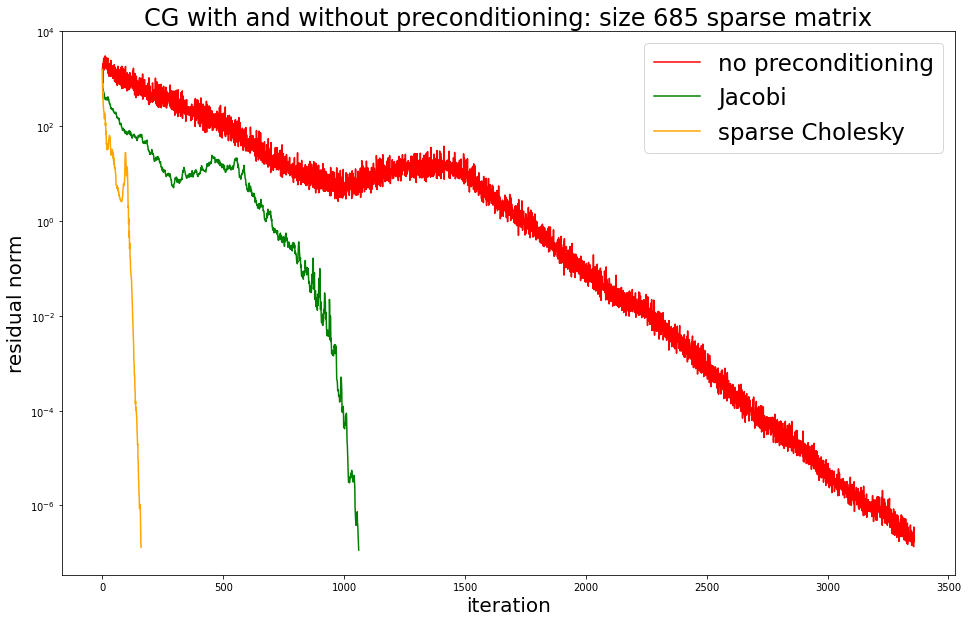

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(rks1, color='red', label='no preconditioning')
plt.plot(rks2, color='green', label='Jacobi')
plt.plot(rks3, color='orange', label='sparse Cholesky')
plt.yscale('log')
plt.xlabel('iteration', fontsize=20)
plt.ylabel('residual norm', fontsize=20)
plt.title('CG with and without preconditioning: size 685 sparse matrix', fontsize=24)
plt.legend(fontsize=23)
#plt.savefig('task3_1138.png')
plt.show()


Возьмём 2 симметричные матрицы, которые положительно определены: матрица №1 размером 685 на 685 и с числом обусловленности $4.2*10^5$ и матрица №2 размером 1138 на 1138 с числом обусловленности $8,6 * 10^6$. В первой матрице $0.69  $ процентов ненулевых элементов, а во второй $0.38%$ процентов. Почему взяты они? потому, что одна почти в 4 раза меньше другой. Сравним число итераций для достижения заданной точности невязки:

Итерации     ...............         1138_bus ..... 685_bus

no_preconditioning      ... 3358   .......... ..  695

Jacobi             .................. ....       1060    ....... ...... 260

(sparce) Cholesky    .....   92    .........  ..... .. 160    

# 🪅 Stochastic optimization tricks

You will study stochastic optimization in the setting of timeseries anomaly detection using an autoencoder.
[source](https://keras.io/examples/timeseries/timeseries_anomaly_detection/)

## Introduction

This script demonstrates how you can use a reconstruction convolutional
autoencoder model to detect anomalies in timeseries data.

## Setup

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

## Load the data

We will use the [Numenta Anomaly Benchmark(NAB)](
https://www.kaggle.com/boltzmannbrain/nab) dataset. It provides artifical
timeseries data containing labeled anomalous periods of behavior. Data are
ordered, timestamped, single-valued metrics.

We will use the `art_daily_small_noise.csv` file for training and the
`art_daily_jumpsup.csv` file for testing. The simplicity of this dataset
allows us to demonstrate anomaly detection effectively.

In [ ]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

## Quick look at the data

In [ ]:
print(df_small_noise.head())

print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


## Visualize the data
### Timeseries data without anomalies

We will use the following data for training.

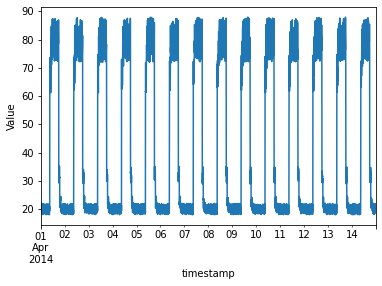

In [ ]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.ylabel('Value')
plt.show()

### Timeseries data with anomalies

We will use the following data for testing and see if the sudden jump up in the
data is detected as an anomaly.

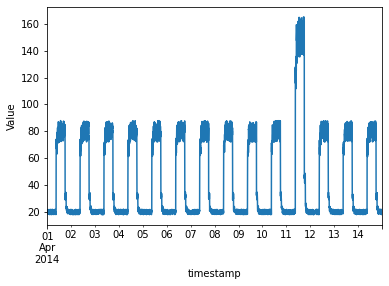

In [ ]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.ylabel('Value')
plt.show()

## Prepare training data

Get data values from the training timeseries data file and normalize the
`value` data. We have a `value` for every 5 mins for 14 days.

-   24 * 60 / 5 = **288 timesteps per day**
-   288 * 14 = **4032 data points** in total

In [ ]:

# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


### Create sequences
Create sequences combining `TIME_STEPS` contiguous data values from the
training data.

In [ ]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


## Build a model

We will build a convolutional reconstruction autoencoder model. The model will
take input of shape `(batch_size, sequence_length, num_features)` and return
output of the same shape. In this case, `sequence_length` is 288 and
`num_features` is 1.

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

## Train the model

Please note that we are using `x_train` as both the input and the target
since this is a reconstruction model.

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 4s 92ms/step - loss: 0.1939 - val_loss: 0.0419
Epoch 2/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0499 - val_loss: 0.0288
Epoch 3/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0339 - val_loss: 0.0231
Epoch 4/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0263 - val_loss: 0.0172
Epoch 5/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0218 - val_loss: 0.0151
Epoch 6/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0203 - val_loss: 0.0169
Epoch 7/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0183 - val_loss: 0.0171
Epoch 8/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0166 - val_loss: 0.0134
Epoch 9/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0153 - val_loss: 0.0157
Epoch 10/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0144 - val_loss: 0.0145
Epoch 11/

Let's plot training and validation loss to see how the training went.

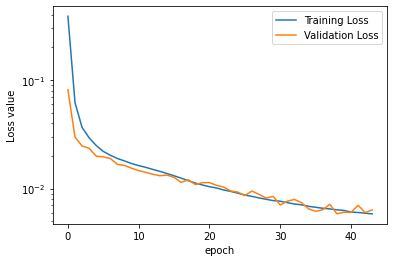

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Detecting anomalies

We will detect anomalies by determining how well our model can reconstruct
the input data.


1.   Find MAE loss on training samples.
2.   Find max MAE loss value. This is the worst our model has performed trying
to reconstruct a sample. We will make this the `threshold` for anomaly
detection.
3.   If the reconstruction loss for a sample is greater than this `threshold`
value then we can infer that the model is seeing a pattern that it isn't
familiar with. We will label this sample as an `anomaly`.


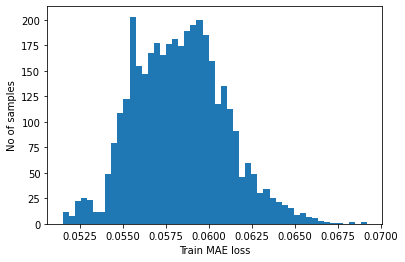

Reconstruction error threshold:  0.06919796281558628


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

### Compare recontruction

Just for fun, let's see how our model has recontructed the first sample.
This is the 288 timesteps from day 1 of our training dataset.

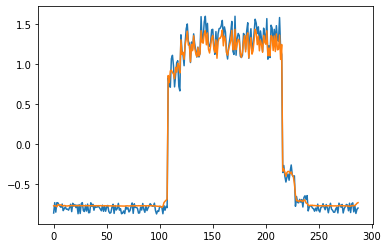

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

### Prepare test data

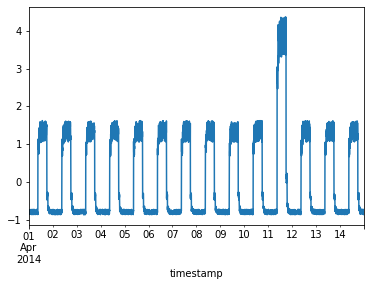

Test input shape:  (3745, 288, 1)


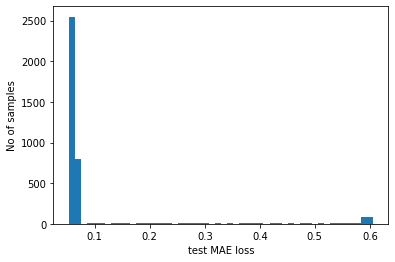

Number of anomaly samples:  436
Indices of anomaly samples:  (array([ 770,  771,  772,  773,  774,  775,  777,  778,  779,  780,  781,
        782,  783,  785,  786,  787,  788,  789,  790,  791,  793,  794,
        795,  799,  803,  806,  970,  971,  973, 1655, 1657, 1658, 1943,
       1945, 1946, 2122, 2123, 2519, 2521, 2523, 2699, 2701, 2702, 2703,
       2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714,
       2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725,
       2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736,
       2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747,
       2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758,
       2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769,
       2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780,
       2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791,
       2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2

In [ ]:

df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

## Plot anomalies

We now know the samples of the data which are anomalies. With this, we will
find the corresponding `timestamps` from the original test data. We will be
using the following method to do that:

Let's say time_steps = 3 and we have 10 training values. Our `x_train` will
look like this:

- 0, 1, 2
- 1, 2, 3
- 2, 3, 4
- 3, 4, 5
- 4, 5, 6
- 5, 6, 7
- 6, 7, 8
- 7, 8, 9

All except the initial and the final time_steps-1 data values, will appear in
`time_steps` number of samples. So, if we know that the samples
[(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point
5 is an anomaly.

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

Let's overlay the anomalies on the original test data plot.

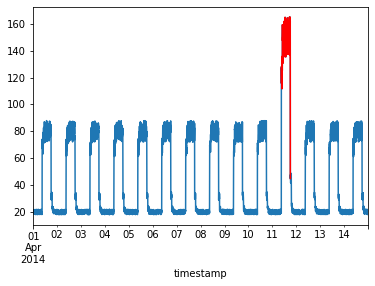

In [ ]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

## Exercises:
In this problem you are to compare different ideas of stochastic optimization. Ensure, that the algorithms are compared in the same setting: same initialization (fix the [seed](https://keras.io/api/layers/initializers/)!) and same amount of epochs. 

### Learning rate schedule
* Train model using SGD optimizer with default hyperparameters. 
* Train model using SGD optimizer with learning rate decay. Instructions can be found via [this](https://keras.io/api/optimizers/learning_rate_schedules/) link. 
* Compare the results.

  Optional: Log results with wandb

<font color="lime"> ==YOUR ANSWER== </font>

**Train model using SGD optimizer with default hyperparameters.:**

In [ ]:

# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


In [ ]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="mse")
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_16 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_17 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_24 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_17 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_25 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                           

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 88ms/step - loss: 0.9780 - val_loss: 0.9439
Epoch 2/50
27/27 [==============================] - 2s 79ms/step - loss: 0.9064 - val_loss: 0.8050
Epoch 3/50
27/27 [==============================] - 2s 79ms/step - loss: 0.6286 - val_loss: 0.2448
Epoch 4/50
27/27 [==============================] - 2s 80ms/step - loss: 0.1573 - val_loss: 0.0542
Epoch 5/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0954 - val_loss: 0.0509
Epoch 6/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0901 - val_loss: 0.0495
Epoch 7/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0862 - val_loss: 0.0487
Epoch 8/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0835 - val_loss: 0.0481
Epoch 9/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0810 - val_loss: 0.0474
Epoch 10/50
27/27 [==============================] - 2s 89ms/step - loss: 0.0790 - val_loss: 0.0469
Epoch 11/

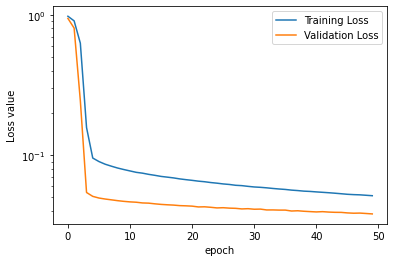

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

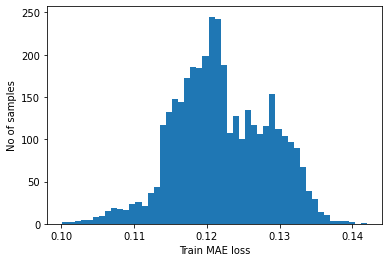

Reconstruction error threshold:  0.14197309479224918


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

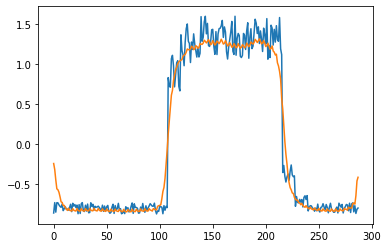

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

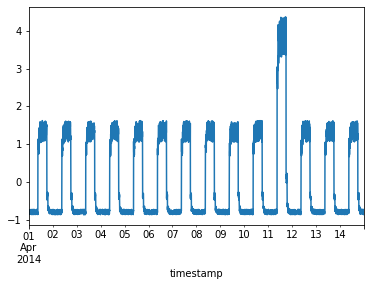

Test input shape:  (3745, 288, 1)


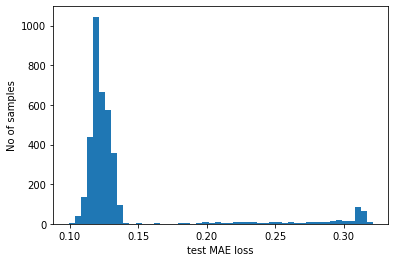

Number of anomaly samples:  390
Indices of anomaly samples:  (array([2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714,
       2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725,
       2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736,
       2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747,
       2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758,
       2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769,
       2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780,
       2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791,
       2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802,
       2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813,
       2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824,
       2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835,
       2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2

In [ ]:

df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

**Train model using SGD optimizer with learning rate decay. Instructions can be found via this link.**

In [ ]:
import tensorflow as tf
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.7,
    staircase=True)
"""
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              """
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr_schedule), loss="mse")
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_18 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_19 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_27 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_19 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_28 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                           

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 87ms/step - loss: 0.9735 - val_loss: 0.9371
Epoch 2/50
27/27 [==============================] - 2s 79ms/step - loss: 0.8424 - val_loss: 0.6199
Epoch 3/50
27/27 [==============================] - 2s 79ms/step - loss: 0.3518 - val_loss: 0.1049
Epoch 4/50
27/27 [==============================] - 2s 78ms/step - loss: 0.1085 - val_loss: 0.0534
Epoch 5/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0859 - val_loss: 0.0505
Epoch 6/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0810 - val_loss: 0.0496
Epoch 7/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0775 - val_loss: 0.0488
Epoch 8/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0750 - val_loss: 0.0482
Epoch 9/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0729 - val_loss: 0.0477
Epoch 10/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0711 - val_loss: 0.0472
Epoch 11/

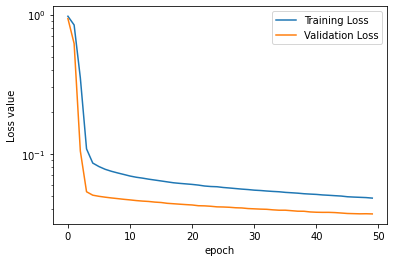

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

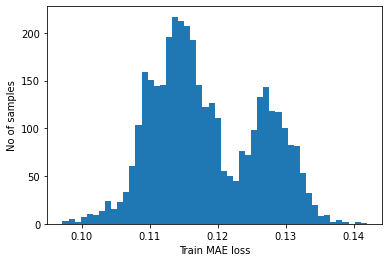

Reconstruction error threshold:  0.1419299759633194


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

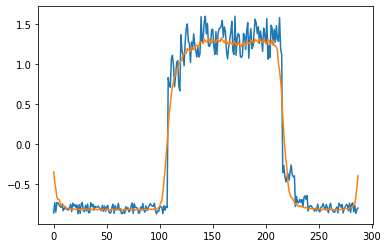

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

ДОБАВЛЕНИЕ LEARNING RATE ускоряет уменьшение validation loss до предельной точности, то есть нужно меньшее количество шагов до достижения нужной ошибки. На графике выглядит, как сдвиг на константу вниз + выше крутизна "падения графика"

### Acceleration
* Train model using SGD optimizer with default hyperparameters. 
* Train model using SGD optimizer with momentum term. 
* Train model using SGD optimizer with nesterov momentum term. Instructions can be found via [this](https://keras.io/api/optimizers/sgd/) link.  
* Compare the results.

  Optional: Log results with wandb

**Train model using SGD optimizer with default hyperparameters. **

<font color="lime"> ==YOUR ANSWER== </font>

In [ ]:

# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


In [ ]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="mse")
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_20 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_30 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_21 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_31 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 90ms/step - loss: 0.9637 - val_loss: 0.9230
Epoch 2/50
27/27 [==============================] - 2s 83ms/step - loss: 0.8224 - val_loss: 0.5957
Epoch 3/50
27/27 [==============================] - 2s 83ms/step - loss: 0.3364 - val_loss: 0.1145
Epoch 4/50
27/27 [==============================] - 2s 82ms/step - loss: 0.1159 - val_loss: 0.0549
Epoch 5/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0928 - val_loss: 0.0503
Epoch 6/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0880 - val_loss: 0.0490
Epoch 7/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0845 - val_loss: 0.0481
Epoch 8/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0813 - val_loss: 0.0472
Epoch 9/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0798 - val_loss: 0.0465
Epoch 10/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0775 - val_loss: 0.0459
Epoch 11/

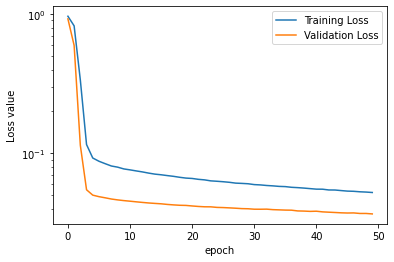

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

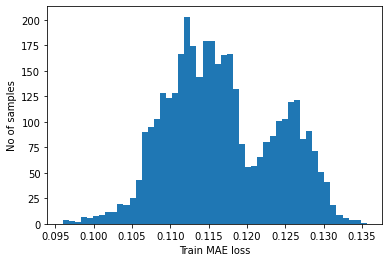

Reconstruction error threshold:  0.13565964897479926


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

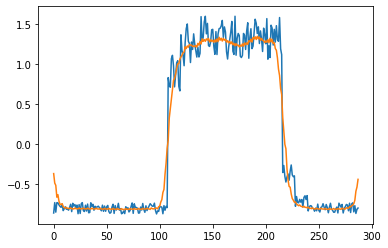

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

ABUSING MOMENTUM


In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss="mse")
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_22 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_23 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_33 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_23 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_34 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 97ms/step - loss: 0.5430 - val_loss: 0.0915
Epoch 2/50
27/27 [==============================] - 2s 88ms/step - loss: 0.1076 - val_loss: 0.0566
Epoch 3/50
27/27 [==============================] - 2s 87ms/step - loss: 0.0718 - val_loss: 0.0494
Epoch 4/50
27/27 [==============================] - 2s 86ms/step - loss: 0.0625 - val_loss: 0.0490
Epoch 5/50
27/27 [==============================] - 2s 86ms/step - loss: 0.0572 - val_loss: 0.0460
Epoch 6/50
27/27 [==============================] - 2s 86ms/step - loss: 0.0532 - val_loss: 0.0440
Epoch 7/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0501 - val_loss: 0.0417
Epoch 8/50
27/27 [==============================] - 2s 86ms/step - loss: 0.0473 - val_loss: 0.0401
Epoch 9/50
27/27 [==============================] - 2s 86ms/step - loss: 0.0449 - val_loss: 0.0391
Epoch 10/50
27/27 [==============================] - 2s 86ms/step - loss: 0.0430 - val_loss: 0.0384
Epoch 11/

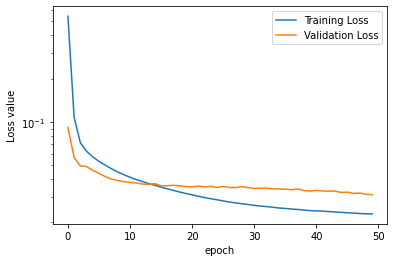

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

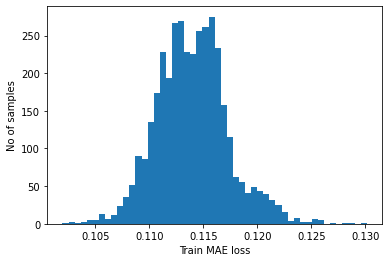

Reconstruction error threshold:  0.1301330441452291


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

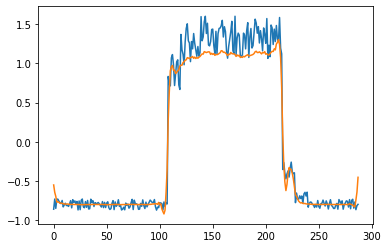

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

**Train model using SGD optimizer with nesterov momentum term. Instructions can be found via this link.**

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum  = 0.8, nesterov=True), loss="mse")
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_12 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_18 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_13 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_19 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                           

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 5s 144ms/step - loss: 0.5740 - val_loss: 0.0832
Epoch 2/50
27/27 [==============================] - 3s 122ms/step - loss: 0.0924 - val_loss: 0.0563
Epoch 3/50
27/27 [==============================] - 4s 147ms/step - loss: 0.0796 - val_loss: 0.0523
Epoch 4/50
27/27 [==============================] - 3s 129ms/step - loss: 0.0731 - val_loss: 0.0501
Epoch 5/50
27/27 [==============================] - 3s 126ms/step - loss: 0.0687 - val_loss: 0.0482
Epoch 6/50
27/27 [==============================] - 3s 128ms/step - loss: 0.0648 - val_loss: 0.0460
Epoch 7/50
27/27 [==============================] - 4s 131ms/step - loss: 0.0616 - val_loss: 0.0445
Epoch 8/50
27/27 [==============================] - 3s 126ms/step - loss: 0.0583 - val_loss: 0.0435
Epoch 9/50
27/27 [==============================] - 3s 128ms/step - loss: 0.0561 - val_loss: 0.0432
Epoch 10/50
27/27 [==============================] - 3s 129ms/step - loss: 0.0538 - val_loss: 0.0415

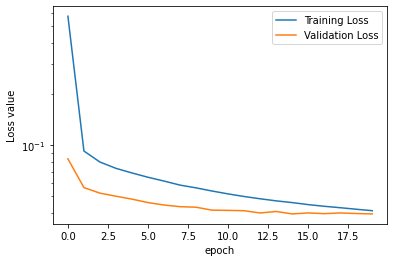

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

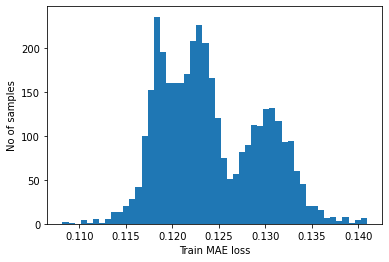

Reconstruction error threshold:  0.1409303680635231


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

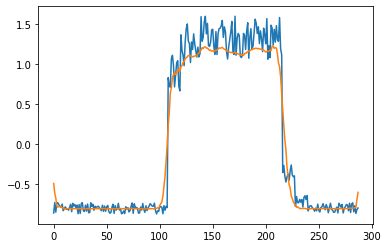

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

# ВЫВОД: 

Заявим, что training loss в целом не изменяется, хотя с nesterov momentum он падает чуть быстрее, однако затем график переламывается и он идёт как остальные.
Сравнивая momentum c чистым SGD видно, что скорость и финальная точность выше у чистого, возможно, из-за неверно подобранного момента, так как он может быть слишком низким.
Тем не менее, nesterov momentum показал лучший результат, дав самую высокую точность в конце и самую маленькую validation loss в начале.

### Adaptive methods
* Train model using SGD optimizer with default hyperparameters. 
* Train model using any adaptive method. Instructions can be found via [this](https://keras.io/api/optimizers/) link.  
* Compare the results.
* Try to perform different runs of SGD + Momentum and select the best hyperparameters. Do the same for the Adam in the similar setting. Compare the results.

  Optional: Log results with wandb

<font color="lime"> ==YOUR ANSWER== </font>

#Train model using SGD optimizer with default hyperparameters.

In [ ]:

# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


In [ ]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
#tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="mse")
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_60 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_60 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_61 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_90 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_61 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_91 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 94ms/step - loss: 1.0005 - val_loss: 0.9930
Epoch 2/50
27/27 [==============================] - 2s 88ms/step - loss: 0.9666 - val_loss: 0.9322
Epoch 3/50
27/27 [==============================] - 2s 88ms/step - loss: 0.8646 - val_loss: 0.7372
Epoch 4/50
27/27 [==============================] - 2s 88ms/step - loss: 0.5611 - val_loss: 0.3416
Epoch 5/50
27/27 [==============================] - 2s 87ms/step - loss: 0.2443 - val_loss: 0.1054
Epoch 6/50
27/27 [==============================] - 2s 89ms/step - loss: 0.1144 - val_loss: 0.0610
Epoch 7/50
27/27 [==============================] - 2s 89ms/step - loss: 0.0959 - val_loss: 0.0550
Epoch 8/50
27/27 [==============================] - 2s 88ms/step - loss: 0.0883 - val_loss: 0.0520
Epoch 9/50
27/27 [==============================] - 2s 88ms/step - loss: 0.0838 - val_loss: 0.0499
Epoch 10/50
27/27 [==============================] - 2s 90ms/step - loss: 0.0802 - val_loss: 0.0484
Epoch 11/

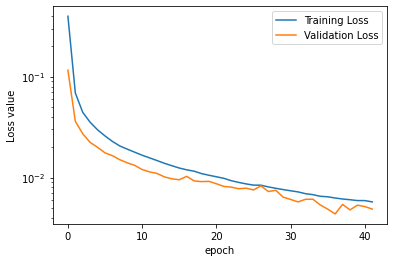

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

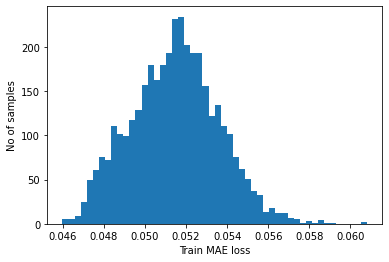

Reconstruction error threshold:  0.060795858691389974


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

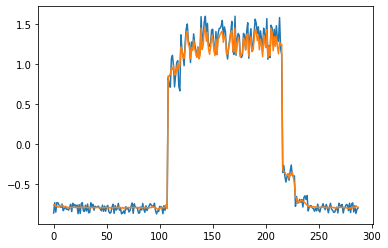

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

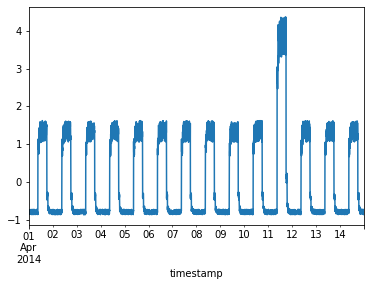

Test input shape:  (3745, 288, 1)


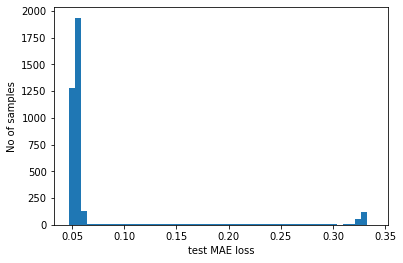

Number of anomaly samples:  412
Indices of anomaly samples:  (array([ 779,  793,  795, 1659, 1947, 2122, 2123, 2521, 2522, 2523, 2526,
       2530, 2698, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709,
       2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720,
       2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731,
       2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742,
       2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753,
       2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764,
       2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775,
       2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786,
       2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797,
       2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808,
       2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819,
       2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2

In [ ]:

df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

#Train model using any adaptive method. Instructions can be found via this link.#

In [ ]:

# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


In [ ]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
#Adam
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_28 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_29 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_42 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_29 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_43 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 93ms/step - loss: 0.2273 - val_loss: 0.0388
Epoch 2/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0478 - val_loss: 0.0240
Epoch 3/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0317 - val_loss: 0.0190
Epoch 4/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0263 - val_loss: 0.0181
Epoch 5/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0229 - val_loss: 0.0164
Epoch 6/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0206 - val_loss: 0.0158
Epoch 7/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0190 - val_loss: 0.0147
Epoch 8/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0179 - val_loss: 0.0144
Epoch 9/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0171 - val_loss: 0.0145
Epoch 10/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0160 - val_loss: 0.0128
Epoch 11/

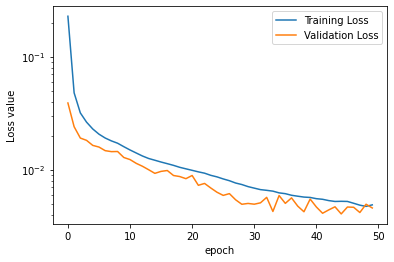

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

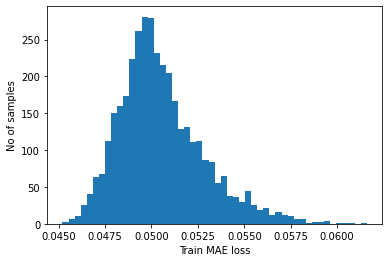

Reconstruction error threshold:  0.061602370242399784


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

#Compare the results.
Adam - /step - loss: 0.0048 - val_loss: 0.0042

Classic SGD /step - loss: 0.0057 - val_loss: 0.0049
Адам сошёлся к лучшему результату и быстрее, а также ему требуется меньшее число samples. Класс, данный метод имеет слысл, так как даёт точность примерно на 15% лучше.

#Try to perform different runs of SGD + Momentum and select the best hyperparameters. Do the same for the Adam in the similar setting. Compare the results.

In [ ]:

# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


In [ ]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="mse")
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_20 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_30 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_21 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_31 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 90ms/step - loss: 0.9637 - val_loss: 0.9230
Epoch 2/50
27/27 [==============================] - 2s 83ms/step - loss: 0.8224 - val_loss: 0.5957
Epoch 3/50
27/27 [==============================] - 2s 83ms/step - loss: 0.3364 - val_loss: 0.1145
Epoch 4/50
27/27 [==============================] - 2s 82ms/step - loss: 0.1159 - val_loss: 0.0549
Epoch 5/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0928 - val_loss: 0.0503
Epoch 6/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0880 - val_loss: 0.0490
Epoch 7/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0845 - val_loss: 0.0481
Epoch 8/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0813 - val_loss: 0.0472
Epoch 9/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0798 - val_loss: 0.0465
Epoch 10/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0775 - val_loss: 0.0459
Epoch 11/

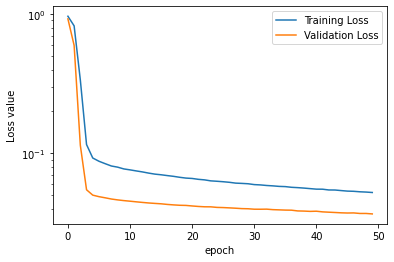

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

#SGD best parameters search

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum = 0.9), loss="mse")
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_30 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_31 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_45 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_31 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_46 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 6s 172ms/step - loss: 0.5709 - val_loss: 0.1483
Epoch 2/50
27/27 [==============================] - 4s 163ms/step - loss: 0.0947 - val_loss: 0.0549
Epoch 3/50
27/27 [==============================] - 4s 157ms/step - loss: 0.0630 - val_loss: 0.0458
Epoch 4/50
27/27 [==============================] - 4s 149ms/step - loss: 0.0560 - val_loss: 0.0439
Epoch 5/50
27/27 [==============================] - 5s 180ms/step - loss: 0.0521 - val_loss: 0.0418
Epoch 6/50
27/27 [==============================] - 4s 133ms/step - loss: 0.0491 - val_loss: 0.0416
Epoch 7/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0467 - val_loss: 0.0407
Epoch 8/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0447 - val_loss: 0.0398
Epoch 9/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0430 - val_loss: 0.0399
Epoch 10/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0415 - val_loss: 0.0395
Epo

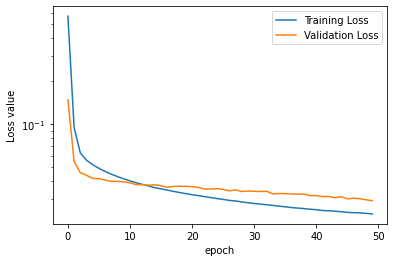

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

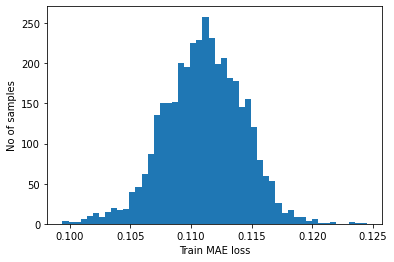

Reconstruction error threshold:  0.1245000178019122


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum = 0.8), loss="mse")
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_32 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_33 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_48 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_33 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_49 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 89ms/step - loss: 0.9270 - val_loss: 0.5128
Epoch 2/50
27/27 [==============================] - 2s 82ms/step - loss: 0.1497 - val_loss: 0.0459
Epoch 3/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0721 - val_loss: 0.0424
Epoch 4/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0653 - val_loss: 0.0409
Epoch 5/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0611 - val_loss: 0.0397
Epoch 6/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0580 - val_loss: 0.0388
Epoch 7/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0554 - val_loss: 0.0380
Epoch 8/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0532 - val_loss: 0.0371
Epoch 9/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0513 - val_loss: 0.0365
Epoch 10/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0496 - val_loss: 0.0358
Epoch 11/

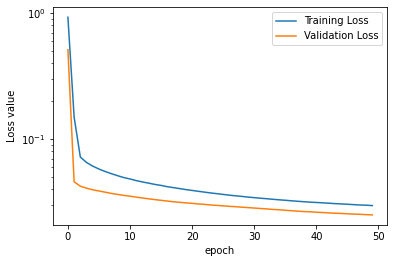

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

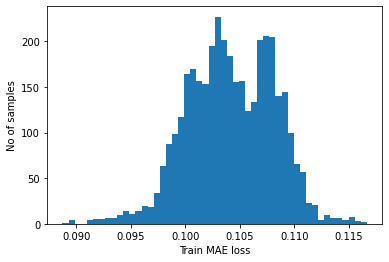

Reconstruction error threshold:  0.11666564462503078


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum = 0.5), loss="mse")
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_34 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_35 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_51 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_35 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_52 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 90ms/step - loss: 0.5250 - val_loss: 0.1863
Epoch 2/50
27/27 [==============================] - 2s 80ms/step - loss: 0.1379 - val_loss: 0.0706
Epoch 3/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0897 - val_loss: 0.0582
Epoch 4/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0818 - val_loss: 0.0569
Epoch 5/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0780 - val_loss: 0.0550
Epoch 6/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0747 - val_loss: 0.0550
Epoch 7/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0720 - val_loss: 0.0547
Epoch 8/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0701 - val_loss: 0.0528
Epoch 9/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0681 - val_loss: 0.0528
Epoch 10/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0662 - val_loss: 0.0508
Epoch 11/

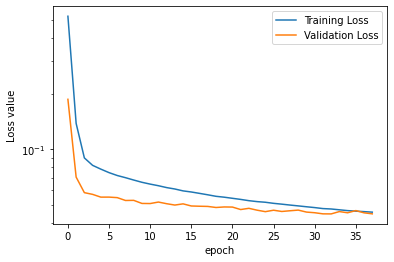

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

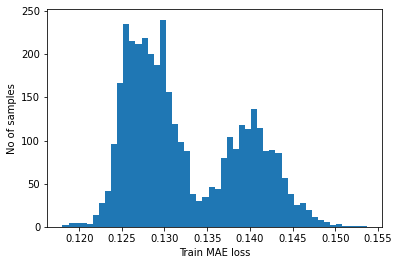

Reconstruction error threshold:  0.1537037494491309


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum = 0.3), loss="mse")
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_36 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_37 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_54 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_37 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_55 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 91ms/step - loss: 0.6188 - val_loss: 0.2743
Epoch 2/50
27/27 [==============================] - 2s 83ms/step - loss: 0.2098 - val_loss: 0.1155
Epoch 3/50
27/27 [==============================] - 2s 83ms/step - loss: 0.1163 - val_loss: 0.0704
Epoch 4/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0932 - val_loss: 0.0611
Epoch 5/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0869 - val_loss: 0.0580
Epoch 6/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0839 - val_loss: 0.0562
Epoch 7/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0811 - val_loss: 0.0547
Epoch 8/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0786 - val_loss: 0.0536
Epoch 9/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0766 - val_loss: 0.0526
Epoch 10/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0749 - val_loss: 0.0515
Epoch 11/

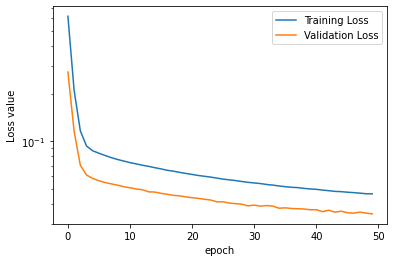

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

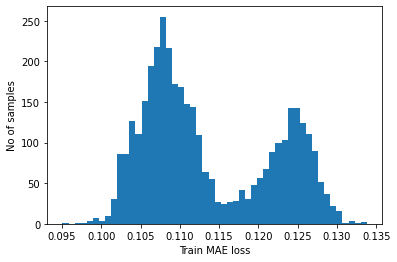

Reconstruction error threshold:  0.1337828755817874


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum = 0.81), loss="mse")
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_42 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_42 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_43 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_63 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_43 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_64 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 5s 139ms/step - loss: 0.7852 - val_loss: 0.0806
Epoch 2/50
27/27 [==============================] - 3s 125ms/step - loss: 0.0899 - val_loss: 0.0456
Epoch 3/50
27/27 [==============================] - 4s 135ms/step - loss: 0.0661 - val_loss: 0.0419
Epoch 4/50
27/27 [==============================] - 3s 120ms/step - loss: 0.0610 - val_loss: 0.0403
Epoch 5/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0574 - val_loss: 0.0390
Epoch 6/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0545 - val_loss: 0.0382
Epoch 7/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0521 - val_loss: 0.0373
Epoch 8/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0503 - val_loss: 0.0366
Epoch 9/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0487 - val_loss: 0.0363
Epoch 10/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0472 - val_loss: 0.0357
Epoch

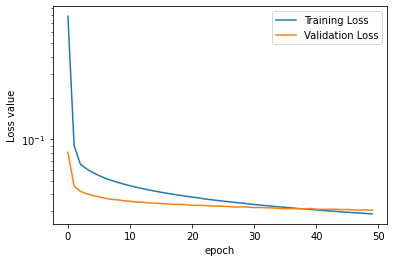

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

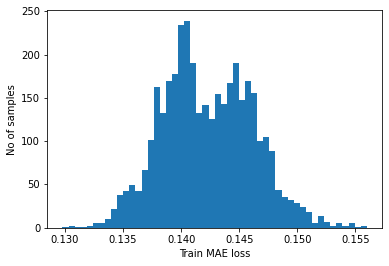

Reconstruction error threshold:  0.15598558112817093


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum = 0.79), loss="mse")
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_44 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_44 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_45 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_66 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_45 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_67 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 90ms/step - loss: 0.5276 - val_loss: 0.0613
Epoch 2/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0831 - val_loss: 0.0526
Epoch 3/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0714 - val_loss: 0.0489
Epoch 4/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0657 - val_loss: 0.0479
Epoch 5/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0617 - val_loss: 0.0467
Epoch 6/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0586 - val_loss: 0.0462
Epoch 7/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0561 - val_loss: 0.0445
Epoch 8/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0538 - val_loss: 0.0436
Epoch 9/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0518 - val_loss: 0.0423
Epoch 10/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0497 - val_loss: 0.0426
Epoch 11/

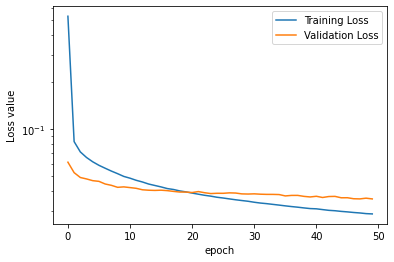

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

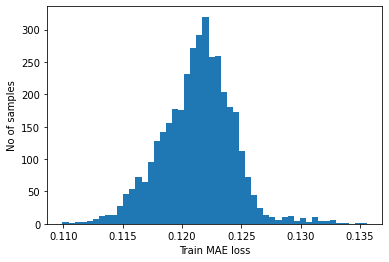

Reconstruction error threshold:  0.1355820500003613


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

#Оптимизируем Adam


In [ ]:
"""
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)
"""

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
#Adam
model.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.8,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
), loss="mse")
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_54 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_54 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_55 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_81 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_55 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_82 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience= 10, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 7s 190ms/step - loss: 0.5615 - val_loss: 0.3357
Epoch 2/50
27/27 [==============================] - 4s 158ms/step - loss: 0.1527 - val_loss: 0.0459
Epoch 3/50
27/27 [==============================] - 4s 147ms/step - loss: 0.0584 - val_loss: 0.0350
Epoch 4/50
27/27 [==============================] - 4s 142ms/step - loss: 0.0458 - val_loss: 0.0286
Epoch 5/50
27/27 [==============================] - 4s 136ms/step - loss: 0.0393 - val_loss: 0.0267
Epoch 6/50
27/27 [==============================] - 3s 115ms/step - loss: 0.0350 - val_loss: 0.0250
Epoch 7/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0318 - val_loss: 0.0234
Epoch 8/50
27/27 [==============================] - 2s 86ms/step - loss: 0.0293 - val_loss: 0.0232
Epoch 9/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0272 - val_loss: 0.0215
Epoch 10/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0257 - val_loss: 0.0205
Epo

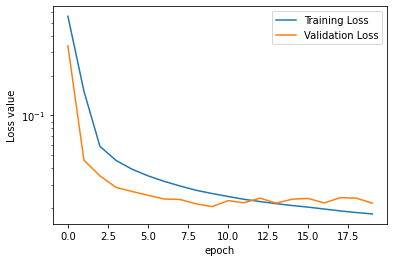

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

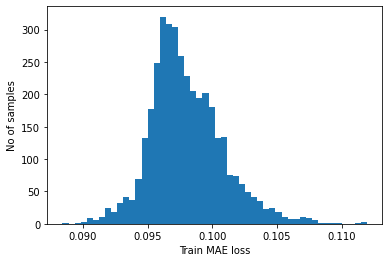

Reconstruction error threshold:  0.11194248254913577


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
#Adam
model.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name="Adam"
), loss="mse")
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_58 (Conv1D)          (None, 144, 32)           256       
                                                                 
 dropout_58 (Dropout)        (None, 144, 32)           0         
                                                                 
 conv1d_59 (Conv1D)          (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_87 (Conv1D  (None, 144, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_59 (Dropout)        (None, 144, 16)           0         
                                                                 
 conv1d_transpose_88 (Conv1D  (None, 288, 32)          3616      
 Transpose)                                          

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 6s 141ms/step - loss: 0.5789 - val_loss: 0.0847
Epoch 2/50
27/27 [==============================] - 2s 87ms/step - loss: 0.0772 - val_loss: 0.0369
Epoch 3/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0542 - val_loss: 0.0327
Epoch 4/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0458 - val_loss: 0.0272
Epoch 5/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0400 - val_loss: 0.0239
Epoch 6/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0355 - val_loss: 0.0218
Epoch 7/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0319 - val_loss: 0.0200
Epoch 8/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0290 - val_loss: 0.0188
Epoch 9/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0269 - val_loss: 0.0185
Epoch 10/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0252 - val_loss: 0.0176
Epoch 11

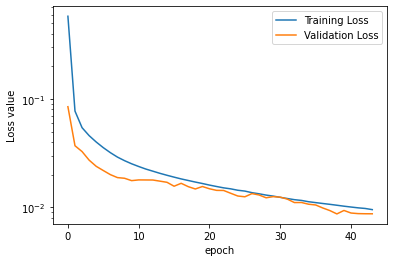

In [ ]:
plt.semilogy(history.history["loss"], label="Training Loss")
plt.semilogy(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss value')
plt.xlabel('epoch')
plt.legend()
plt.show()

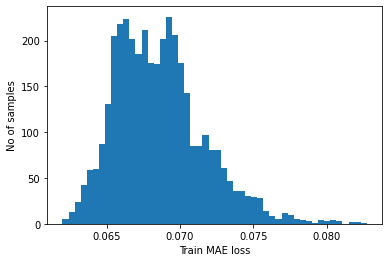

Reconstruction error threshold:  0.08271352528547493


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

#Try to perform different runs of SGD + Momentum and select the best hyperparameters. Do the same for the Adam in the similar setting. Compare the results.

Optional: Log results with wandb
Для SGD с моментумом имеем лучший результат val loss для momentum = 0.8 loss: 0.0297 - val_loss: 0.0251

Для 0.79  loss: 0.0286 - val_loss: 0.0357

и 0.81 loss: 0.0287 - val_loss: 0.0305 хотя их train loss ниже.

Для остальных значений оно выходит за 0.03

Для Adam базовое значение равно: loss: 0.0049 - val_loss: 0.0046

С beta1 = 0.8: loss: 0.0073 - val_loss: 0.0082

Однако если включить amsgrad, то step - loss: 0.0095 - val_loss: 0.0087

Вывод: адам, конечно работает быстрее momentum и точнее. В 5 раз. И уж точно быстрее базового sgd с (loss: 0.0525 - val_loss: 0.0369), давая точность выше  в 7 раз.
Другими словами, эффективность использования более сложных и продвинутых алгоритмов очевидна, так как в реальности разброс в 1 метр позволяет попасть в ростовую мишень, а разброс в 5 или 7 - нет.
Времена работы в целом одинаковые и нельзя сказать, что кто-то работает даже на 5-10% процентов быстрее другого, но это специфика задачи.

Log results with wandb - сделано. 

[Link](https://colab.research.google.com/github/wandb/examples/blob/master/colabs/keras/Simple_Keras_Integration.ipynb) to the keras + wandb.

In [ ]:
%%capture
!pip install wandb

In [ ]:
import wandb
from wandb.keras import WandbCallback

!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Initialize wandb with your project name
run = wandb.init(project='my-keras-integration',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.01,
                     "epochs": 50,
                     "batch_size": 128,
                     "loss_function": "mse",
                     "architecture": "Autoencoder",
                     "dataset": "Daily anomaly"
                 })
config = wandb.config  # We'll use this to configure our experiment

wandb: Currently logged in as: hcl-271 (g_party). Use `wandb login --relogin` to force relogin
